In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def plot_stimulus_table(stim_table, title):
    fstart = stim_table.start.min()
    fend = stim_table.end.max()
    
    fig = plt.figure(figsize=(15,1))
    ax = fig.gca()
    for i, trial in stim_table.iterrows():    
        x1 = float(trial.start - fstart) / (fend - fstart)
        x2 = float(trial.end - fstart) / (fend - fstart)            
        ax.add_patch(patches.Rectangle((x1, 0.0), x2 - x1, 1.0, color='r'))
    ax.set_xticks((0,1))
    ax.set_xticklabels((fstart, fend))
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_xlabel("frames")

2021-09-20 13:32:42,972 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516238128


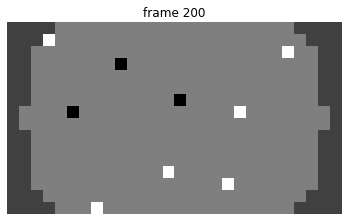

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
data_set = boc.get_ophys_experiment_data(505693621)

# read in the locally sparse noise stimulus movie.  
# the 'mask_offscreen' argument will set off-screen grid locations to LocallySparseNoise.LSN_OFF_SCREEN
lsn_movie, offscreen_mask = data_set.get_locally_sparse_noise_stimulus_template('locally_sparse_noise',
                                                                                mask_off_screen=True)



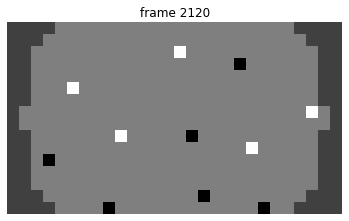

In [7]:
# show a single frame of the stimulus for reference
frame = 2120
plt.imshow(lsn_movie[frame,:,:], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('frame %d' % frame)
plt.show()